# Combination Of Faces
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

This code performs low-pass filtering on an input image using Fourier transforms. 

The `low_filter` function generates a low-pass filter in the frequency domain based on the specified type (either `'IDEAL'`, `'Gaussian'`, or `'Butterworth'`) and with the given parameters `sigma` and `n`. The function first calculates the shape of the input image, and then generates a meshgrid of x and y coordinates that correspond to the Fourier transform domain. The `r` variable is then calculated to represent the radial distance from the center of the Fourier transform domain. Depending on the specified filter type, the function generates a filter mask and returns it.

The `low_filter_image` function applies the generated filter to the input image using Fourier transforms. First, the `low_filter` function is called to generate the low-pass filter. Then, the function computes the Fourier transform of the input image using `np.fft.fft2`, and shifts the zero-frequency component to the center of the Fourier transform using `np.fft.fftshift`. The filter is then applied to the shifted Fourier transform by element-wise multiplication. This filtered Fourier transform is then shifted back to the original position using `np.fft.ifftshift`, and the inverse Fourier transform is calculated using `np.fft.ifft2` to obtain the filtered image. Finally, `np.real` is used to extract the real part of the filtered image, since the imaginary part should be negligible. 

The function returns two outputs: the magnitude spectrum of the filtered image, which is computed by taking the absolute value of the filtered Fourier transform and applying the logarithm to enhance contrast, and the filtered image itself.

In [2]:
def low_filter(img, kind, sigma=15, n=2):
    shape = img.shape
    centerX = np.floor(shape[0] / 2)
    centerY = np.floor(shape[1] / 2)

    x = np.linspace(-centerX, centerX, shape[0])
    y = np.linspace(-centerY, centerY, shape[1])
    xv, yv = np.meshgrid(x, y)
    
    r = xv**2 + yv**2

    lowFilter = None
    if kind == 'IDEAL':
        lowFilter = np.sqrt(r) <= sigma
    elif kind == 'Gaussian':
        lowFilter = np.exp(-r/(2 * sigma**2))
    elif kind == 'Butterworth':
        lowFilter = 1 / (1 + (np.sqrt(r)/sigma) ** (2*n))

    return lowFilter


def low_filter_image(img, kind, sigma=15, n=2):
    lowFilter = low_filter(img, kind, sigma, n)
    
    ft = np.fft.fft2(img)
    ft_shift = np.fft.fftshift(ft)

    magnitudeLow = np.log(1 + np.abs(ft_shift * lowFilter.T))
    lowFilterImage = np.real(np.fft.ifft2(np.fft.ifftshift(ft_shift * lowFilter.T)))

    return magnitudeLow, lowFilterImage

This code performs high-pass filtering on an input image using Fourier transforms. 

The `high_filter` function generates a high-pass filter in the frequency domain based on the specified type (either `'IDEAL'`, `'Gaussian'`, or `'Butterworth'`) and with the given parameters `sigma` and `n`. Depending on the specified filter type, the function generates a filter mask that is the complement of the corresponding low-pass filter mask generated by calling the `low_filter` function. This is achieved by subtracting the low-pass mask from 1.

The `high_filter_image` function applies the generated high-pass filter to the input image using Fourier transforms. First, the `high_filter` function is called to generate the high-pass filter. Then, the function computes the Fourier transform of the input image using `np.fft.fft2`, and shifts the zero-frequency component to the center of the Fourier transform using `np.fft.fftshift`. The filter is then applied to the shifted Fourier transform by element-wise multiplication. This filtered Fourier transform is then shifted back to the original position using `np.fft.ifftshift`, and the inverse Fourier transform is calculated using `np.fft.ifft2` to obtain the filtered image. Finally, `np.real` is used to extract the real part of the filtered image, since the imaginary part should be negligible. 

The function returns two outputs: the magnitude spectrum of the filtered image, which is computed by taking the absolute value of the filtered Fourier transform and applying the logarithm to enhance contrast, and the filtered image itself.

In [3]:
def high_filter(img, kind, sigma=15, n=2):
    if kind == 'IDEAL':
        return 1 - low_filter(img, 'IDEAL', sigma=sigma, n=n)
    elif kind == 'Gaussian':
        return 1 - low_filter(img, 'Gaussian', sigma=sigma, n=n)
    elif kind == 'Butterworth':
        return 1 - low_filter(img, 'Butterworth', sigma=sigma, n=n)
    else:
        return None

def high_filter_image(img, kind, sigma=15, n=2):
    highFilter = high_filter(img, kind, sigma, n)

    ft = np.fft.fft2(img)
    ft_shift = np.fft.fftshift(ft)

    magnitudeHigh = np.log(1 + np.abs(ft_shift * highFilter.T))
    highFilterImage = np.real(np.fft.ifft2(np.fft.ifftshift(ft_shift * highFilter.T)))

    return magnitudeHigh, highFilterImage

This code combines low-pass and high-pass filtered images to create a new image. 

The `combination_of_faces` function takes in two input images, `img1` and `img2`, and a filter type `kind` (either `'IDEAL'`, `'Gaussian'`, or `'Butterworth'`) with optional parameters `sigma` and `n`. The function first applies a low-pass filter to `img1` and a high-pass filter to `img2` using the `low_filter_image` and `high_filter_image` functions. The `maglow` and `low_image` variables store the magnitude spectrum and filtered image of `img1`, while the `maghigh` and `high_image` variables store the magnitude spectrum and filtered image of `img2`.

The function then combines the low-pass and high-pass filtered images by adding them together, resulting in a hybrid image that contains both low-frequency and high-frequency information. The Fourier transform of the hybrid image is then computed using `np.fft.fft2`, and the zero-frequency component is shifted to the center using `np.fft.fftshift`. The magnitude spectrum of the Fourier transform is computed by taking the absolute value and applying the logarithm to enhance contrast. The final output of the function is a tuple containing the magnitude spectrum and the combined image.

Note that since the low-pass filter removes high-frequency information and the high-pass filter removes low-frequency information, the resulting combined image can appear different depending on the viewing distance. At a far distance, only the low-frequency information is visible and the image appears similar to the low-pass filtered image, while at a close distance, the high-frequency information becomes more visible and the image appears similar to the high-pass filtered image.

In [4]:
def combination_of_faces(img1, img2, kind, sigma=15, n=2):
    maglow, low_image = low_filter_image(img1, kind, sigma, n)
    maghigh, high_image = high_filter_image(img2, kind, sigma, n)

    comb = low_image + high_image
    ft = np.fft.fft2(comb)
    ft_shift = np.fft.fftshift(ft)
    magnitude = np.log(1 + np.abs(ft_shift))

    return magnitude, comb

The following function, as the main function of the program, receives two input photos and then performs all the operations and prints the output.

In [5]:
def process(img1, img2, kind, sigma=15, n=2):
    img1 = (img1 - np.min(img1)) / (np.max(img1) - np.min(img1))
    img2 = (img2 - np.min(img2)) / (np.max(img2) - np.min(img2))

    ft1 = np.fft.fft2(img1)
    ft_shift1 = np.fft.fftshift(ft1)
    mag1 = np.log(1 + np.abs(ft_shift1))

    ft2 = np.fft.fft2(img2)
    ft_shift2 = np.fft.fftshift(ft2)
    mag2 = np.log(1 + np.abs(ft_shift2))

    magLow, imgFromLowFilter = low_filter_image(img1, kind, sigma, n)
    magHigh, imgFromHighFilter = high_filter_image(img2, kind, sigma, n)
    magCom, combination = combination_of_faces(img1, img2, kind, sigma, n)

    plt.figure(figsize=(10, 10))
    plt.subplot(5, 2, 1), plt.imshow(img1, cmap='gray'), plt.title('Image1'), plt.xticks([]), plt.yticks([])
    plt.subplot(5, 2, 2), plt.imshow(mag1, cmap='gray'), plt.title('Magnitude1'), plt.xticks([]), plt.yticks([])
    plt.subplot(5, 2, 3), plt.imshow(imgFromLowFilter, cmap='gray'), plt.title('ImageLowFilter'), plt.xticks([]), plt.yticks([])
    plt.subplot(5, 2, 4), plt.imshow(magLow, cmap='gray'), plt.title('LowFilter'), plt.xticks([]), plt.yticks([])
    plt.subplot(5, 2, 5), plt.imshow(img2, cmap='gray'), plt.title('Image2'), plt.xticks([]), plt.yticks([])
    plt.subplot(5, 2, 6), plt.imshow(mag2, cmap='gray'), plt.title('Magnitude2'), plt.xticks([]), plt.yticks([])
    plt.subplot(5, 2, 7), plt.imshow(imgFromHighFilter, cmap='gray'), plt.title('ImageHighFilter'), plt.xticks([]), plt.yticks([])
    plt.subplot(5, 2, 8), plt.imshow(magHigh, cmap='gray'), plt.title('HighFilter'), plt.xticks([]), plt.yticks([])
    plt.subplot(5, 2, 9), plt.imshow(combination, cmap='gray'), plt.title('Combination'), plt.xticks([]), plt.yticks([])
    plt.subplot(5, 2, 10), plt.imshow(magCom, cmap='gray'), plt.title('MagnitudeCom'), plt.xticks([]), plt.yticks([])

    plt.show()

In [6]:
messi = cv2.imread('Images/messi.png', 0)
ronaldo = cv2.imread('Images/ronaldo.png', 0)

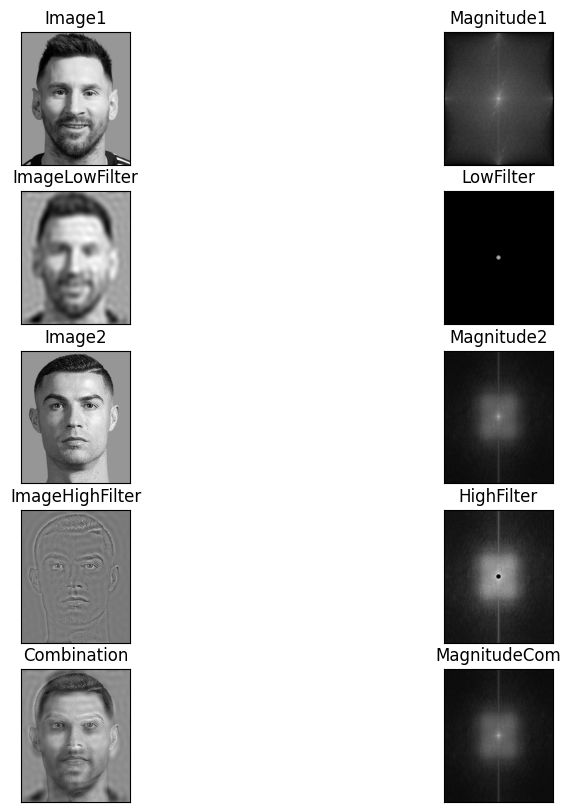

In [7]:
process(messi, ronaldo, 'IDEAL')

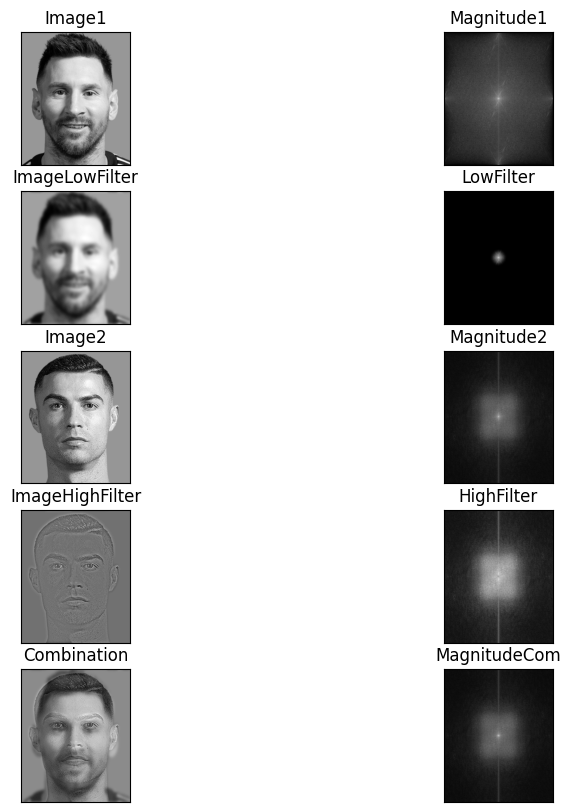

In [8]:
process(messi, ronaldo, 'Gaussian')

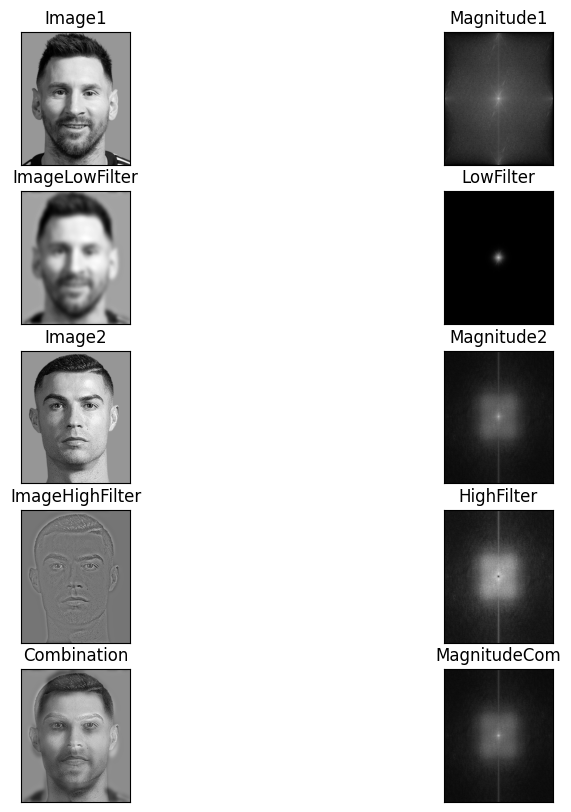

In [9]:
process(messi, ronaldo, 'Butterworth')

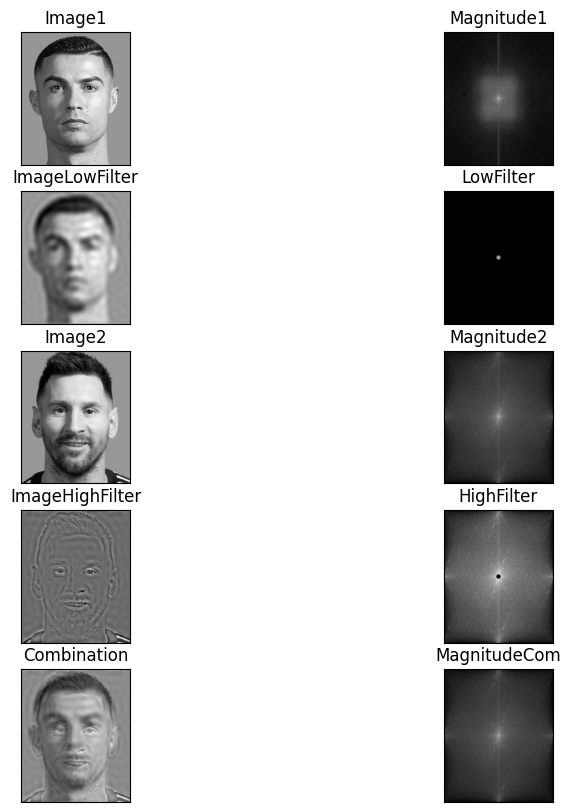

In [10]:
process(ronaldo, messi, 'IDEAL')

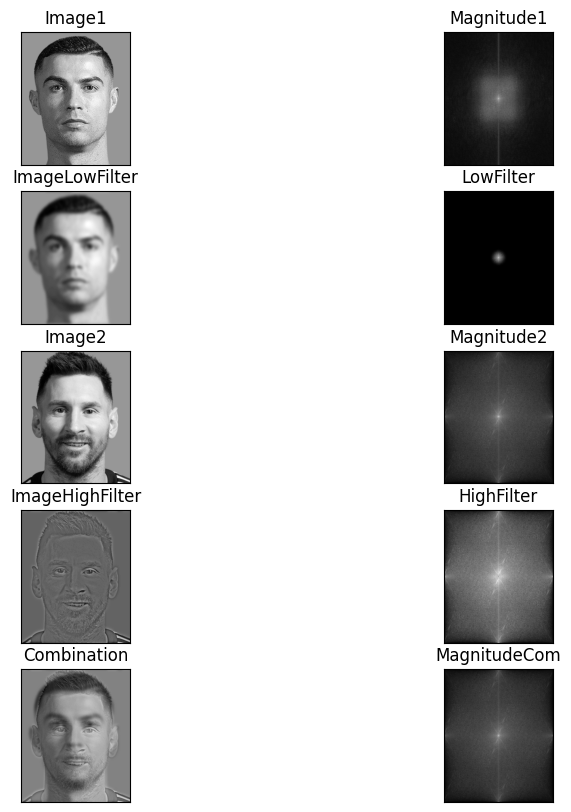

In [11]:
process(ronaldo, messi, 'Gaussian')

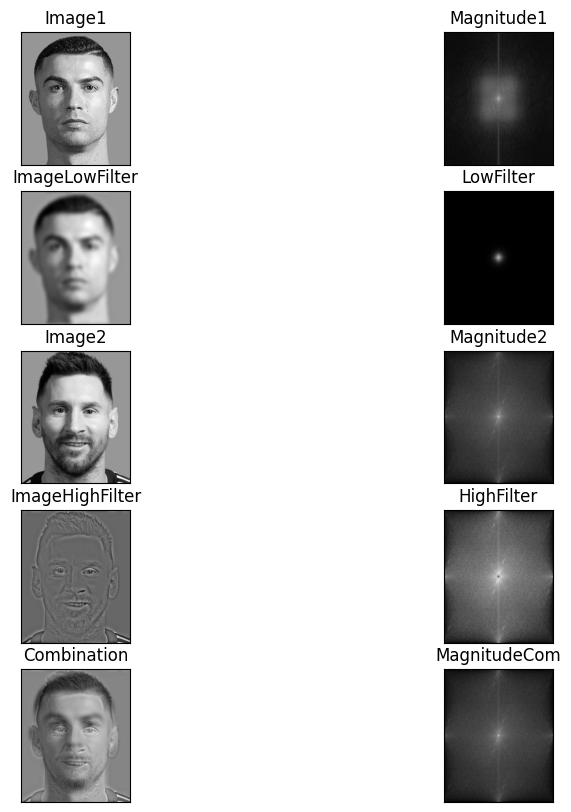

In [12]:
process(ronaldo, messi, 'Butterworth')